## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# 超參數

In [5]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 35
MOMENTUM = 0.95
BATCH_SIZE = 256
L_EXP=[1e-2, 1e-4, 1e-8, 1e-12]

# L1_L2 regulariztaion

In [6]:
from keras.regularizers import l1, l2, l1_l2

In [7]:
help(keras.regularizers.l1_l2)

Help on function l1_l2 in module keras.regularizers:

l1_l2(l1=0.01, l2=0.01)



In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32], L_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden-layer"+str(i+1),
                                  kernel_regularizer=l1_l2(L_ratio, L_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden-layer"+str(i+1),
                                  kernel_regularizer=l1_l2(L_ratio, L_ratio))(x)
            
    out = keras.layers.Dense(units=output_units,
                                  activation="softmax",
                                  name="output",
                                  kernel_regularizer=l1_l2(L_ratio, L_ratio))(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [9]:
results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for L1_L2 in L_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (L1_L2))
    model = build_mlp(input_shape=x_train.shape[1:], L_ratio=L1_L2)
    model.summary()
    
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-L1_L2-%s" % str(L1_L2)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden-layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden-layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden-layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [========

50000/50000 [==============================] - 7s 130us/step - loss: 2.5629 - accuracy: 0.4202 - val_loss: 2.5370 - val_accuracy: 0.4280
Epoch 7/35
50000/50000 [==============================] - 5s 100us/step - loss: 2.5138 - accuracy: 0.4309 - val_loss: 2.4986 - val_accuracy: 0.4349
Epoch 8/35
50000/50000 [==============================] - 5s 95us/step - loss: 2.4698 - accuracy: 0.4431 - val_loss: 2.4669 - val_accuracy: 0.4383
Epoch 9/35
50000/50000 [==============================] - 5s 94us/step - loss: 2.4276 - accuracy: 0.4530 - val_loss: 2.4385 - val_accuracy: 0.4468
Epoch 10/35
50000/50000 [==============================] - 5s 98us/step - loss: 2.3903 - accuracy: 0.4606 - val_loss: 2.3988 - val_accuracy: 0.4546
Epoch 11/35
50000/50000 [==============================] - 5s 94us/step - loss: 2.3551 - accuracy: 0.4673 - val_loss: 2.3640 - val_accuracy: 0.4598
Epoch 12/35
50000/50000 [==============================] - 5s 95us/step - loss: 2.3215 - accuracy: 0.4737 - val_loss: 2.3469 

50000/50000 [==============================] - 5s 95us/step - loss: 1.4000 - accuracy: 0.5032 - val_loss: 1.4752 - val_accuracy: 0.4695
Epoch 20/35
50000/50000 [==============================] - 5s 95us/step - loss: 1.3879 - accuracy: 0.5075 - val_loss: 1.4646 - val_accuracy: 0.4734
Epoch 21/35
50000/50000 [==============================] - 5s 94us/step - loss: 1.3736 - accuracy: 0.5115 - val_loss: 1.4856 - val_accuracy: 0.4726
Epoch 22/35
50000/50000 [==============================] - 5s 92us/step - loss: 1.3623 - accuracy: 0.5165 - val_loss: 1.4543 - val_accuracy: 0.4807
Epoch 23/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.3491 - accuracy: 0.5225 - val_loss: 1.4511 - val_accuracy: 0.4802
Epoch 24/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.3385 - accuracy: 0.5265 - val_loss: 1.4376 - val_accuracy: 0.4916
Epoch 25/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.3286 - accuracy: 0.5296 - val_loss: 1.4604

50000/50000 [==============================] - 5s 92us/step - loss: 1.2618 - accuracy: 0.5516 - val_loss: 1.4089 - val_accuracy: 0.5029
Epoch 33/35
50000/50000 [==============================] - 5s 92us/step - loss: 1.2536 - accuracy: 0.5515 - val_loss: 1.4436 - val_accuracy: 0.4874
Epoch 34/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.2446 - accuracy: 0.5547 - val_loss: 1.4044 - val_accuracy: 0.5021
Epoch 35/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.2358 - accuracy: 0.5585 - val_loss: 1.4206 - val_accuracy: 0.5001


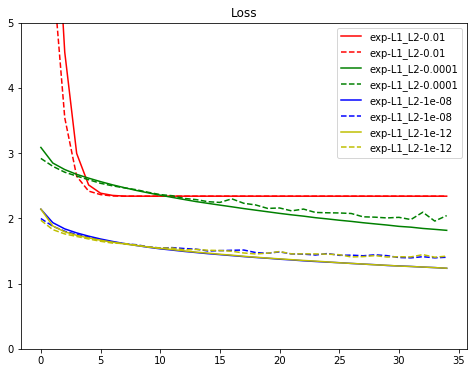

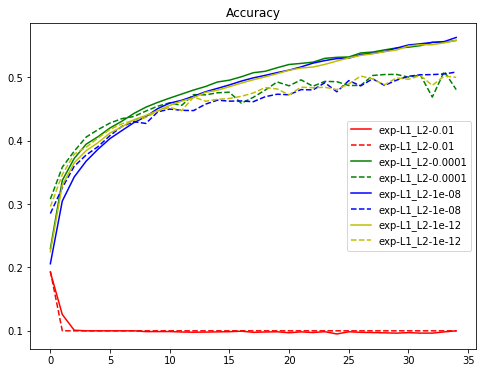

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# L1 regulariztaion

In [11]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32], L_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1),
                                  kernel_regularizer=l1(L_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1),
                                  kernel_regularizer=l1(L_ratio))(x)
            
    out = keras.layers.Dense(units=output_units,
                                  activation="softmax",
                                  name="output",
                                  kernel_regularizer=l1(L_ratio))(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [12]:
results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for L1 in L_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (L1))
    model = build_mlp(input_shape=x_train.shape[1:], L_ratio=L1)
    model.summary()
    
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-L1-%s" % str(L1)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [========

50000/50000 [==============================] - 4s 88us/step - loss: 2.5409 - accuracy: 0.4140 - val_loss: 2.5327 - val_accuracy: 0.4081
Epoch 7/35
50000/50000 [==============================] - 4s 87us/step - loss: 2.4968 - accuracy: 0.4236 - val_loss: 2.4796 - val_accuracy: 0.4252
Epoch 8/35
50000/50000 [==============================] - 4s 87us/step - loss: 2.4547 - accuracy: 0.4333 - val_loss: 2.4456 - val_accuracy: 0.4318
Epoch 9/35
50000/50000 [==============================] - 4s 88us/step - loss: 2.4157 - accuracy: 0.4429 - val_loss: 2.4043 - val_accuracy: 0.4393
Epoch 10/35
50000/50000 [==============================] - 4s 87us/step - loss: 2.3791 - accuracy: 0.4508 - val_loss: 2.3728 - val_accuracy: 0.4465
Epoch 11/35
50000/50000 [==============================] - 5s 92us/step - loss: 2.3462 - accuracy: 0.4584 - val_loss: 2.3500 - val_accuracy: 0.4562
Epoch 12/35
50000/50000 [==============================] - 4s 89us/step - loss: 2.3140 - accuracy: 0.4642 - val_loss: 2.3209 - 

50000/50000 [==============================] - 4s 88us/step - loss: 1.4052 - accuracy: 0.5032 - val_loss: 1.4831 - val_accuracy: 0.4761
Epoch 20/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3931 - accuracy: 0.5053 - val_loss: 1.5060 - val_accuracy: 0.4720
Epoch 21/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3832 - accuracy: 0.5089 - val_loss: 1.4516 - val_accuracy: 0.4854
Epoch 22/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3723 - accuracy: 0.5114 - val_loss: 1.4703 - val_accuracy: 0.4724
Epoch 23/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3587 - accuracy: 0.5172 - val_loss: 1.4427 - val_accuracy: 0.4906
Epoch 24/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3487 - accuracy: 0.5204 - val_loss: 1.4328 - val_accuracy: 0.4948
Epoch 25/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3370 - accuracy: 0.5246 - val_loss: 1.4310

50000/50000 [==============================] - 5s 91us/step - loss: 1.2687 - accuracy: 0.5518 - val_loss: 1.4231 - val_accuracy: 0.4924
Epoch 33/35
50000/50000 [==============================] - 5s 96us/step - loss: 1.2592 - accuracy: 0.5539 - val_loss: 1.4410 - val_accuracy: 0.4891
Epoch 34/35
50000/50000 [==============================] - 5s 92us/step - loss: 1.2490 - accuracy: 0.5570 - val_loss: 1.4117 - val_accuracy: 0.5021
Epoch 35/35
50000/50000 [==============================] - 5s 95us/step - loss: 1.2419 - accuracy: 0.5607 - val_loss: 1.3999 - val_accuracy: 0.5079


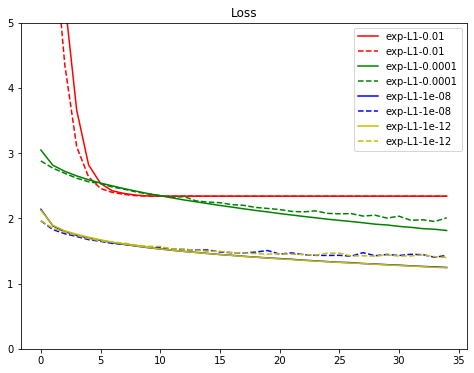

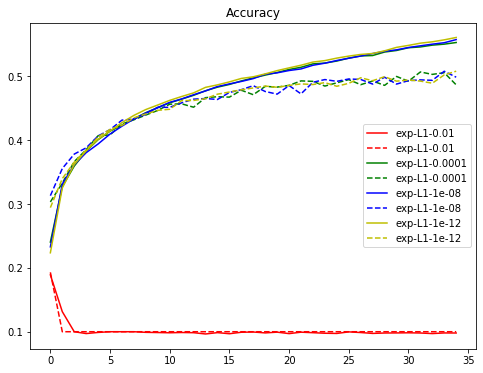

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# L2 regulariztaion

In [18]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32], L_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden-layer"+str(i+1),
                                  kernel_regularizer=l2(L_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden-layer"+str(i+1),
                                  kernel_regularizer=l2(L_ratio))(x)
            
    out = keras.layers.Dense(units=output_units,
                                  activation="softmax",
                                  name="output",
                                  kernel_regularizer=l2(L_ratio))(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [19]:
results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for L2 in L_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (L2))
    model = build_mlp(input_shape=x_train.shape[1:], L_ratio=L2)
    model.summary()
    
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-L2-%s" % str(L2)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden-layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden-layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden-layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [========

50000/50000 [==============================] - 4s 86us/step - loss: 1.7477 - accuracy: 0.3922 - val_loss: 1.7243 - val_accuracy: 0.4053
Epoch 7/35
50000/50000 [==============================] - 4s 83us/step - loss: 1.7143 - accuracy: 0.4035 - val_loss: 1.6958 - val_accuracy: 0.4172
Epoch 8/35
50000/50000 [==============================] - 4s 82us/step - loss: 1.6851 - accuracy: 0.4146 - val_loss: 1.6740 - val_accuracy: 0.4203
Epoch 9/35
50000/50000 [==============================] - 4s 83us/step - loss: 1.6585 - accuracy: 0.4259 - val_loss: 1.6544 - val_accuracy: 0.4238
Epoch 10/35
50000/50000 [==============================] - 5s 107us/step - loss: 1.6320 - accuracy: 0.4357 - val_loss: 1.6331 - val_accuracy: 0.4357
Epoch 11/35
50000/50000 [==============================] - 7s 131us/step - loss: 1.6101 - accuracy: 0.4428 - val_loss: 1.6149 - val_accuracy: 0.4402
Epoch 12/35
50000/50000 [==============================] - 5s 101us/step - loss: 1.5897 - accuracy: 0.4494 - val_loss: 1.5997

50000/50000 [==============================] - 4s 86us/step - loss: 1.3820 - accuracy: 0.5091 - val_loss: 1.4463 - val_accuracy: 0.4847
Epoch 20/35
50000/50000 [==============================] - 4s 83us/step - loss: 1.3689 - accuracy: 0.5118 - val_loss: 1.4407 - val_accuracy: 0.4867
Epoch 21/35
50000/50000 [==============================] - 4s 84us/step - loss: 1.3525 - accuracy: 0.5199 - val_loss: 1.4308 - val_accuracy: 0.4901
Epoch 22/35
50000/50000 [==============================] - 5s 97us/step - loss: 1.3417 - accuracy: 0.5248 - val_loss: 1.4385 - val_accuracy: 0.4886
Epoch 23/35
50000/50000 [==============================] - 5s 94us/step - loss: 1.3315 - accuracy: 0.5279 - val_loss: 1.4194 - val_accuracy: 0.4939
Epoch 24/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.3199 - accuracy: 0.5304 - val_loss: 1.4354 - val_accuracy: 0.4931
Epoch 25/35
50000/50000 [==============================] - 5s 102us/step - loss: 1.3065 - accuracy: 0.5365 - val_loss: 1.421

50000/50000 [==============================] - 4s 80us/step - loss: 1.2539 - accuracy: 0.5554 - val_loss: 1.4042 - val_accuracy: 0.5042
Epoch 33/35
50000/50000 [==============================] - 4s 80us/step - loss: 1.2454 - accuracy: 0.5602 - val_loss: 1.4228 - val_accuracy: 0.5039
Epoch 34/35
50000/50000 [==============================] - 4s 80us/step - loss: 1.2351 - accuracy: 0.5636 - val_loss: 1.4116 - val_accuracy: 0.5028
Epoch 35/35
50000/50000 [==============================] - 4s 81us/step - loss: 1.2289 - accuracy: 0.5660 - val_loss: 1.3867 - val_accuracy: 0.5109


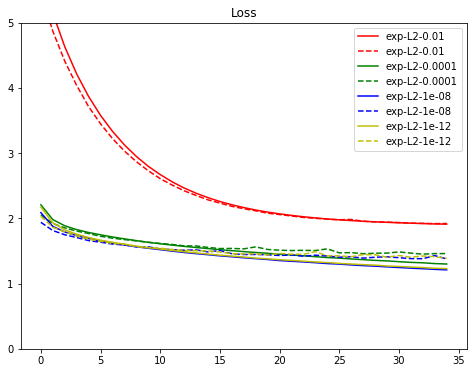

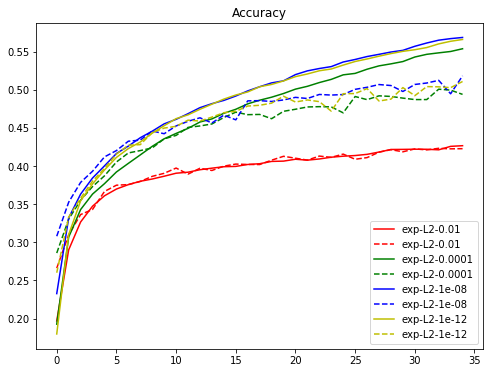

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()